## First Test on Original SAM Model

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
image = cv2.imread('/home/student/Documents/Arpit_sir/SOLAR/CodeFiles/dhruv_git/Solar_Rooftop_Detection/Arial_images_1024_1024/images/7.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
image.shape

(1024, 1024, 3)

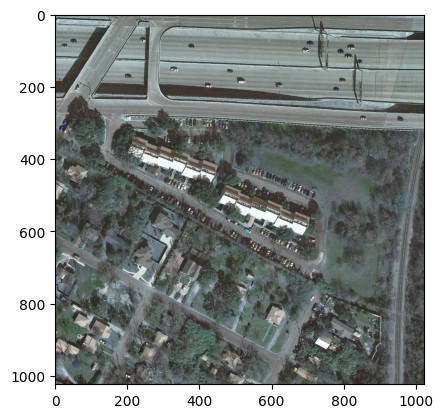

In [4]:
plt.imshow(image)

In [8]:
mask = cv2.imread('/home/student/Documents/Arpit_sir/SOLAR/CodeFiles/dhruv_git/Solar_Rooftop_Detection/Arial_images_1024_1024/masks/7.jpg', cv2.IMREAD_GRAYSCALE)
mask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [253, 255, 254, ...,   0,   0,   0],
       [255, 252, 255, ...,   0,   0,   0],
       [254, 255, 253, ...,   0,   0,   0]], dtype=uint8)

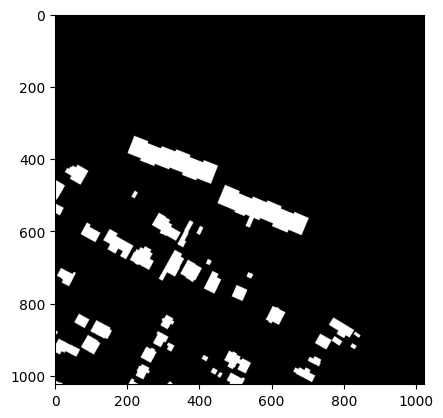

In [10]:
plt.imshow(mask, cmap="gray")
plt.show()

In [11]:
from Solar_Rooftop_Detection.generate_isolated_masks import generate_isolated_mask

In [12]:
from Solar_Rooftop_Detection.get_bounding_box_cordinates import bounding_box

In [13]:
get_bb = bounding_box(mask)
m = len(get_bb)
print(len(get_bb))

44


In [14]:
from segment_anything import sam_model_registry, SamPredictor

In [15]:
sam_checkpoint = "/home/student/Documents/Arpit_sir/SOLAR/CodeFiles/dhruv_git/Solar_Rooftop_Detection/sam_vit_b.pth"
model_type = "vit_b"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)


/home/student/Documents/Arpit_sir/solar_vnv/lib/python3.10/site-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.

In [16]:
predictor.set_image(image)

In [17]:
masks, scores, logits = predictor.predict(
    point_coords=None,
    point_labels=None,
    multimask_output=True,
)

In [18]:
masks

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [32]:
(masks[0] == mask[1]).sum(), len(mask[0])*len(mask[0])

(1048576, 1048576)

In [33]:
(masks[0] == mask[2]).sum(), len(mask[0])*len(mask[0])

(1048576, 1048576)

## all  three masks are same.

In [20]:
scores

array([0.29228958, 0.46724212, 0.73158896], dtype=float32)

In [21]:
logits

array([[[ -0.7926944 ,  -0.7795326 ,  -0.8649786 , ...,  -0.94003373,
          -0.930417  ,  -0.8071974 ],
        [ -0.8002678 ,  -0.7974834 ,  -0.8079055 , ...,  -0.74859583,
          -0.74554855,  -0.73729235],
        [ -0.94432724,  -0.76637   ,  -0.86999154, ...,  -0.7522185 ,
          -0.76491696,  -0.71825695],
        ...,
        [ -1.460788  ,  -1.3688391 ,  -1.372661  , ...,  -1.1216911 ,
          -1.1244586 ,  -1.1096339 ],
        [ -1.5295639 ,  -1.4382935 ,  -1.4242774 , ...,  -1.0077553 ,
          -1.074097  ,  -0.94646955],
        [ -1.4446188 ,  -1.4298121 ,  -1.4362463 , ...,  -1.1412679 ,
          -1.014438  ,  -1.1044464 ]],

       [[-12.122368  , -12.655445  , -12.208352  , ..., -10.649261  ,
         -12.792422  , -10.527998  ],
        [-13.6114    , -15.682898  , -13.876069  , ..., -14.407943  ,
         -13.951619  , -12.476725  ],
        [-10.911852  ,  -9.419601  ,  -9.902428  , ..., -11.286144  ,
         -12.609135  , -10.363926  ],
        ...,


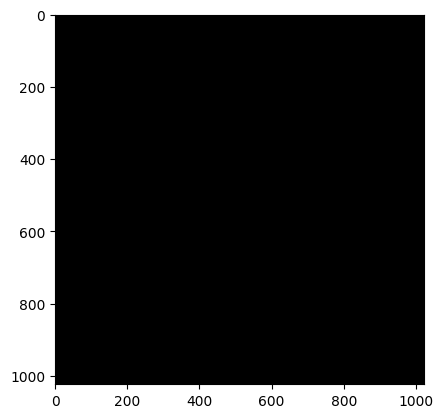

In [22]:
plt.imshow(masks[0], cmap="gray")
plt.show()

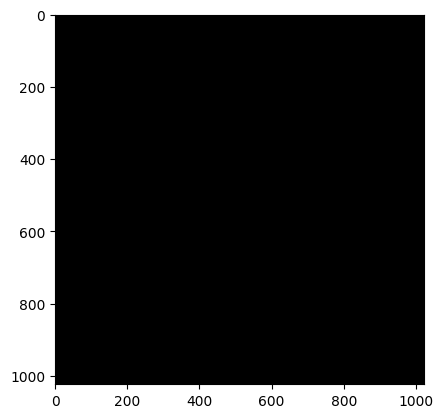

In [23]:
plt.imshow(masks[1], cmap="gray")
plt.show()

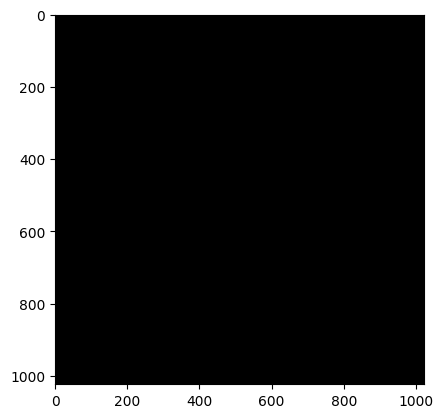

In [24]:
plt.imshow(masks[2], cmap="gray")
plt.show()

## lets try with prompt.

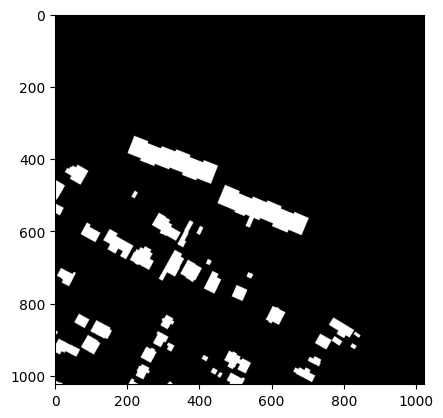

In [35]:
plt.imshow(mask, cmap="gray")
plt.show()

In [36]:
## lets get the prompt corrdinates.

In [37]:
from Solar_Rooftop_Detection.get_bounding_box_cordinates import plot_bounding_box

In [38]:
get_bb

[(311, 1016, 326, 1024),
 (0, 1015, 22, 1024),
 (204, 1008, 230, 1024),
 (475, 992, 526, 1024),
 (449, 991, 464, 1007),
 (431, 979, 450, 998),
 (659, 978, 720, 1019),
 (223, 969, 262, 1011),
 (700, 947, 737, 975),
 (406, 944, 424, 961),
 (468, 932, 543, 995),
 (237, 921, 281, 965),
 (817, 911, 835, 928),
 (310, 909, 331, 934),
 (0, 898, 69, 948),
 (72, 888, 125, 942),
 (719, 885, 795, 928),
 (826, 879, 846, 896),
 (271, 878, 314, 922),
 (0, 875, 8, 887),
 (98, 847, 157, 899),
 (758, 840, 828, 897),
 (292, 832, 330, 873),
 (53, 829, 95, 869),
 (583, 808, 638, 860),
 (489, 750, 532, 794),
 (530, 714, 549, 732),
 (412, 711, 460, 774),
 (5, 703, 58, 754),
 (347, 680, 407, 742),
 (418, 678, 433, 695),
 (287, 653, 357, 738),
 (207, 643, 273, 708),
 (134, 595, 217, 678),
 (391, 586, 410, 611),
 (71, 577, 126, 631),
 (339, 571, 383, 646),
 (268, 550, 348, 628),
 (0, 524, 24, 557),
 (212, 489, 229, 510),
 (450, 473, 702, 612),
 (0, 460, 27, 514),
 (27, 417, 92, 472),
 (201, 337, 451, 470)]

In [41]:
## randomally choose any one bb coordinates of rooftop 

index = torch.randint(0,len(get_bb) , [1])
index

tensor([35])

In [50]:
bb = get_bb[index]
bb

(71, 577, 126, 631)

In [53]:
mask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [253, 255, 254, ...,   0,   0,   0],
       [255, 252, 255, ...,   0,   0,   0],
       [254, 255, 253, ...,   0,   0,   0]], dtype=uint8)

In [55]:
tmask  = torch.Tensor(mask)
tmask.shape

torch.Size([1024, 1024])

71 577 126 631


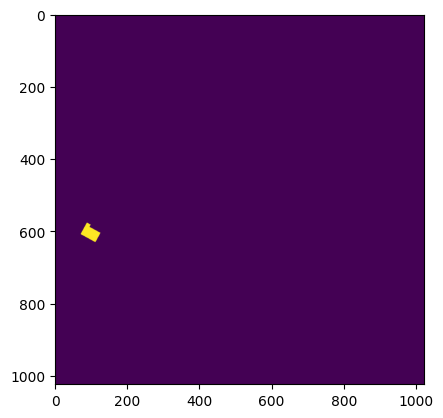

In [57]:
## for this bb the original mask 
original_mask = generate_isolated_mask(tmask, bb)
plt.imshow(original_mask)
plt.show()

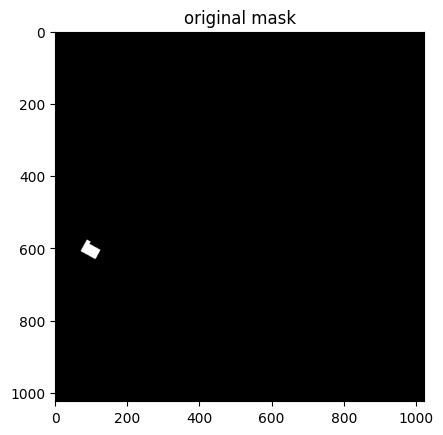

In [58]:
plt.title("original mask")
plt.imshow(original_mask, cmap="gray")
plt.show()

In [60]:
### lets try to predict mask by using SAM model.
sam_model_registry

{'default': <function segment_anything.build_sam.build_sam_vit_h(checkpoint=None)>,
 'vit_h': <function segment_anything.build_sam.build_sam_vit_h(checkpoint=None)>,
 'vit_l': <function segment_anything.build_sam.build_sam_vit_l(checkpoint=None)>,
 'vit_b': <function segment_anything.build_sam.build_sam_vit_b(checkpoint=None)>}

In [64]:
input_bb = np.array(bb)
input_bb

array([ 71, 577, 126, 631])

In [65]:
input_bb[None, :]

array([[ 71, 577, 126, 631]])

In [66]:
masks_sam, scores, logits = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_bb[None, :],
    multimask_output=True,
)

In [67]:
masks_sam

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

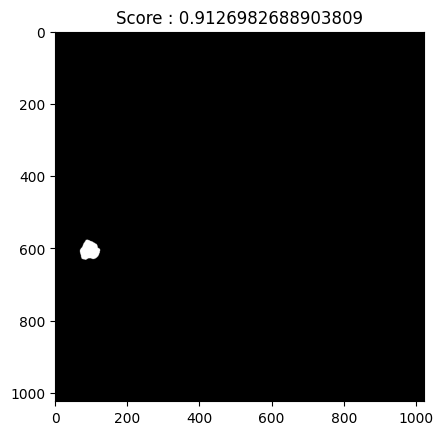

In [71]:
plt.title(f"Score : {scores[0]}")
plt.imshow(masks_sam[0], cmap="gray")
plt.show()

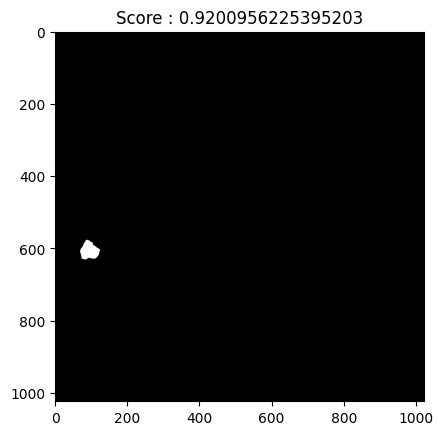

In [72]:
plt.title(f"Score : {scores[1]}")
plt.imshow(masks_sam[1], cmap="gray")
plt.show()

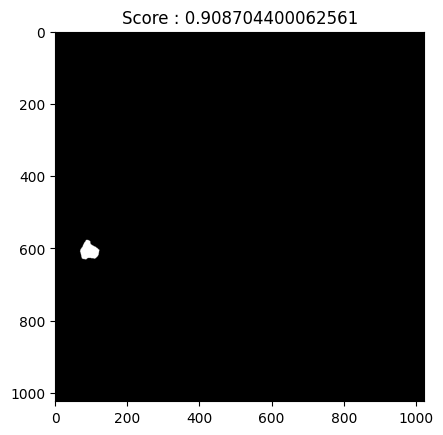

In [73]:
plt.title(f"Score : {scores[2]}")
plt.imshow(masks_sam[2], cmap="gray")
plt.show()

In [74]:
masks_sam2, scores, logits = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_bb[None, :],
    multimask_output=False,
)

In [76]:
len(masks_sam), len(masks_sam2)

(3, 1)

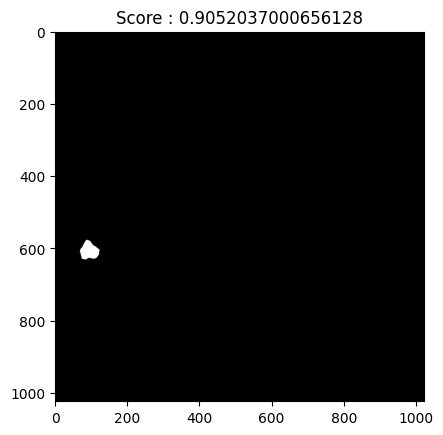

In [75]:
plt.title(f"Score : {scores[0]}")
plt.imshow(masks_sam2[0], cmap="gray")
plt.show()

## lets try on our pretained model.

In [78]:
sam_checkpoint = "checkpoints/Final_Models/images_10_epoch_10_15_02_2025.pth"
model_type = "vit_b"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)


/home/student/Documents/Arpit_sir/solar_vnv/lib/python3.10/site-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.

In [79]:
predictor

In [80]:
predictor.set_image(image)

In [81]:
masks_pre_sam, scores, logits = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_bb[None, :],
    multimask_output=False
)

In [82]:
len(masks_pre_sam)

1

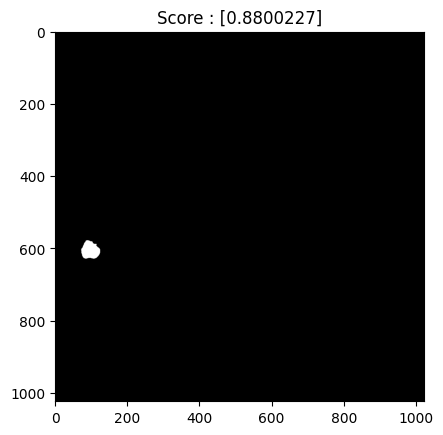

In [84]:
plt.title(f"Score : {scores}")
plt.imshow(masks_pre_sam[0], cmap="gray")
plt.show()

In [85]:
masks_pre_sam, scores, logits = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_bb[None, :],
    multimask_output= True
)

In [86]:
len(masks_pre_sam)

3

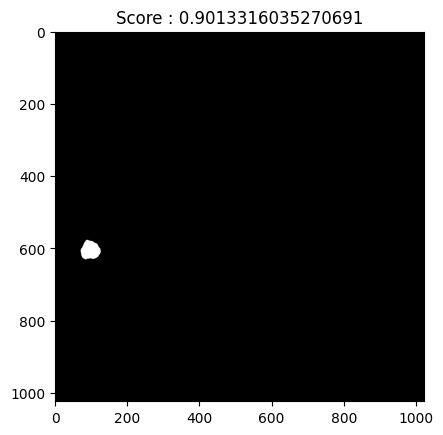

In [88]:
plt.title(f"Score : {scores[0]}")
plt.imshow(masks_pre_sam[0], cmap="gray")
plt.show()

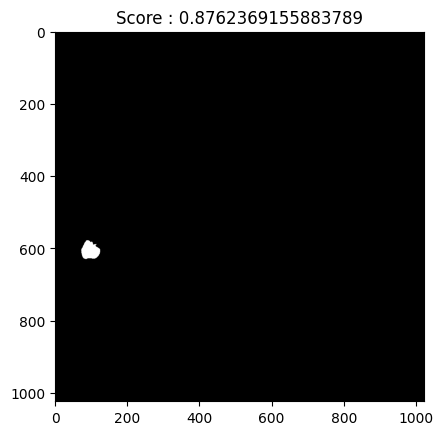

In [89]:
plt.title(f"Score : {scores[1]}")
plt.imshow(masks_pre_sam[1], cmap="gray")
plt.show()

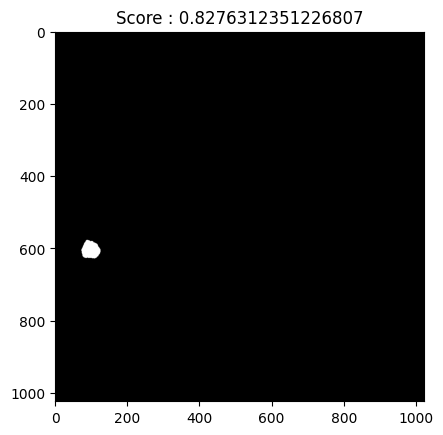

In [90]:
plt.title(f"Score : {scores[2]}")
plt.imshow(masks_pre_sam[2], cmap="gray")
plt.show()